In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig_prefix = "../figures/hittingtime_"
data_prefix = "../data/hittingtime_"

# Get simulated data results

In [211]:
#import data
df = pd.read_csv('../data/hittingtime100Dense2_1x1.csv', header=None)

In [212]:
M = df.values
M = np.asmatrix(M)
M = M.reshape((100,100))

In [213]:
M

matrix([[   0.        ,   60.98060567,   92.69469705, ...,  215.26433777,
          216.43091357,  217.04292865],
        [  60.98060567,    0.        ,   83.06833938, ...,  214.61046481,
          215.73573182,  216.33547903],
        [  92.69469705,   83.06833938,    0.        , ...,  213.23123921,
          214.21186366,  214.76770604],
        ..., 
        [ 215.26433777,  214.61046481,  213.23123921, ...,    0.        ,
           83.13319486,   91.23912748],
        [ 216.43091357,  215.73573182,  214.21186366, ...,   83.13319486,
            0.        ,   60.90381562],
        [ 217.04292865,  216.33547903,  214.76770604, ...,   91.23912748,
           60.90381562,    0.        ]])

In [214]:
M[9,90]

217.51995258900101

In [215]:
M[90,9]

217.51995258900101

In [216]:
M[0,9]

196.82253371829569

In [217]:
M[9,0]

196.82253371829566

In [218]:
sample = M[0,:]
sample.shape

(1, 100)

In [219]:
sample = sample.reshape((10,10))

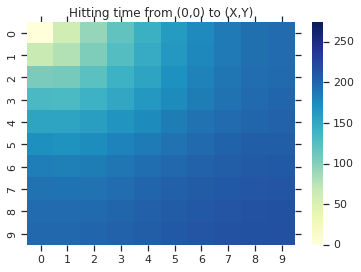

In [367]:
#Create graphic heatmap of position without n taken out
#Take the log of everything so it can be graphed, add 1 to get rid of log(0)

heatmap_position = sns.heatmap(sample, annot=False,vmax=275, cmap="YlGnBu").set_title('Hitting time from (0,0) to (X,Y)')
plot = heatmap_position.get_figure()
plot.savefig(fig_prefix + "position_heatmap.png")
plot.savefig(fig_prefix + 'position_heatmap.eps', format='eps', dpi=1000)

# Real Life Data

## 1x1 data

In [260]:
df_cross = pd.read_csv('../data/reallife1x1.csv', header=None)
df_cross = df_cross.sample(n=20)
df_cross['start'] = '(9,9)'
df_cross.head()

,0,start
20,4.22,"(9,9)"
52,3.95,"(9,9)"
57,1.91,"(9,9)"
29,24.48,"(9,9)"
43,2.38,"(9,9)"


In [261]:
df_adj = pd.read_csv('../data/reallife1x1_adjacent.csv', header=None)
df_adj['start'] = '(9,0)'
df_adj.head()

,0,start
0,4.97,"(9,0)"
1,5.17,"(9,0)"
2,30.94,"(9,0)"
3,4.58,"(9,0)"
4,11.30,"(9,0)"


In [262]:
df_half_adj = pd.read_csv('../data/reallife1x1_half_adjacent.csv', header=None)
df_half_adj['start'] = '(0,4)'
df_half_adj.head()

,0,start
0,2.98,"(0,4)"
1,5.96,"(0,4)"
2,1.90,"(0,4)"
3,15.52,"(0,4)"
4,12.42,"(0,4)"


In [263]:
df_near = pd.read_csv('../data/reallife1x1_near.csv', header=None)
df_near['start'] = '(2,2)'
df_near.head()

,0,start
0,1.64,"(2,2)"
1,1.07,"(2,2)"
2,4.85,"(2,2)"
3,11.77,"(2,2)"
4,0.97,"(2,2)"


In [264]:

#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20, 10))
#sns.distplot(df_cross[0], bins=20, kde=False, rug=True, ax=ax1).set_title('Hitting time frequency from (0,0) to (9,9)')
#sns.distplot(df_half_adj[0], bins=20, kde=False, rug=True, ax=ax2).set_title('Hitting time frequency from (0,0) to (9,4)')
#sns.distplot(df_adj[0], bins=20, kde=False, rug=True, ax=ax3).set_title('Hitting time frequency from (0,0) to (9,0)')


In [265]:

#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 10))
#sns.distplot(df_cross[0], bins=20, kde=False, rug=True, ax=ax1).set_title('Hitting time frequency from (0,0) to (9,9)')
#sns.distplot(df_adj[0], bins=20, kde=False, rug=True, ax=ax2).set_title('Hitting time frequency from (0,0) to (9,0)')


In [266]:
result = pd.concat([df_cross, df_adj, df_half_adj, df_near], axis=0, join='inner')
result.index = range(len(result))
result.columns = ['value', 'start']
result.head()

,value,start
0,4.22,"(9,9)"
1,3.95,"(9,9)"
2,1.91,"(9,9)"
3,24.48,"(9,9)"
4,2.38,"(9,9)"


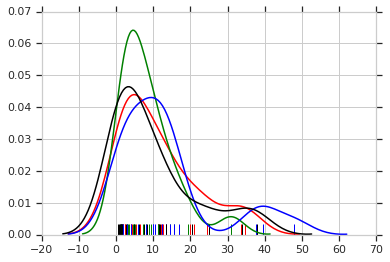

In [267]:


# Sort the dataframe by target
target_0 = result.loc[result['start'] == '(9,9)']
target_1 = result.loc[result['start'] == '(9,0)']
target_2 = result.loc[result['start'] == '(0,4)']
target_3 = result.loc[result['start'] == '(2,2)']

sns.distplot(target_0[['value']], hist=False, rug=True, color='red', norm_hist= False)
sns.distplot(target_1[['value']], hist=False, rug=True, color='green', norm_hist= False)
sns.distplot(target_2[['value']], hist=False, rug=True, color='blue', norm_hist= False)
sns.distplot(target_3[['value']], hist=False, rug=True, color='black', norm_hist= False)

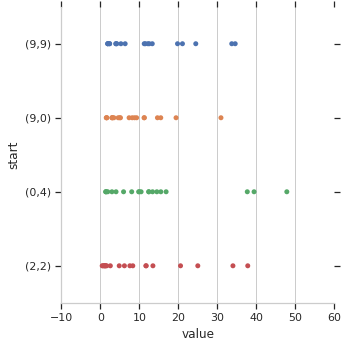

In [268]:
sns.catplot(x="value", y="start", jitter=False, orient='h',data=result)

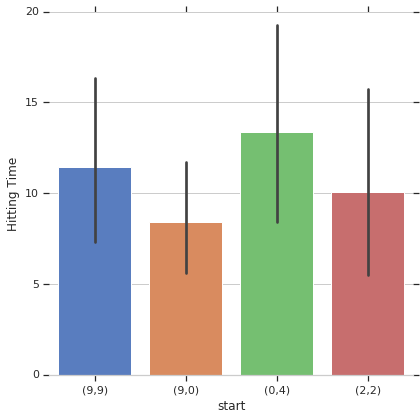

In [269]:

#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(20, 10))
#sns.distplot(df_cross[0], bins=20, kde=False, rug=True, ax=ax1).set_title('Hitting time frequency from (0,0) to (9,9)')
#sns.distplot(df_half_adj[0], bins=20, kde=False, rug=True, ax=ax2).set_title('Hitting time frequency from (0,0) to (9,4)')
#sns.distplot(df_adj[0], bins=20, kde=False, rug=True, ax=ax3).set_title('Hitting time frequency from (0,0) to (9,0)')

sns.set(style="whitegrid")



# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="start", y="value", data=result,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Hitting Time")
#g.savefig(fig_prefix + 'position_heatmap.eps', format='eps', dpi=1000)

In [323]:
cross_mean = np.mean(df_cross[0])
half_adj_mean = np.mean(df_half_adj[0])
adj_mean = np.mean(df_adj[0])
near_mean = np.mean(df_near[0])

cross_std = np.std(df_cross[0])
half_adj_std = np.std(df_half_adj[0])
adj_std = np.std(df_adj[0])
near_std = np.std(df_near[0])

print("Cross mean = {}, std = {}".format(cross_mean,cross_std))
print("Full adj mean = {}, std = {}".format(adj_mean,adj_std))
print("Half adj mean = {}, std = {}".format(half_adj_mean,half_adj_std))
print("near adj mean = {}, std = {}".format(near_mean,near_std))

Cross mean = 11.4455, std = 10.0800840646
Full adj mean = 8.4435, std = 7.14999949301
Half adj mean = 13.3825, std = 12.9362695067
near adj mean = 10.0694736842, std = 11.1661252167


In [324]:
#Find the probability of the weaselballs hitting immediately
#We define as hitting immediately as any time being under 2.5 seconds
#result = pd.concat([df_cross, df_adj, df_half_adj, df_near], axis=0, join='inner')
immediate_collision_time = 2.0

cross_immediate_hit_df = df_cross.loc[df_cross[0] < immediate_collision_time]
cross_immediate_hit_probability = float(cross_immediate_hit_df.shape[0]) / float(df_cross.shape[0])
print(df_cross.shape[0])
half_adj_immediate_hit_df = df_half_adj.loc[df_half_adj[0] < immediate_collision_time]
half_adj_immediate_hit_df = float(half_adj_immediate_hit_df.shape[0]) / float(df_half_adj.shape[0])

adj_immediate_hit_df = df_adj.loc[df_adj[0] < immediate_collision_time]
adj_immediate_hit_probability = float(adj_immediate_hit_df.shape[0]) / float(df_adj.shape[0])

near_immediate_hit_df = df_near.loc[df_near[0] < immediate_collision_time]
near_immediate_hit_probability = float(near_immediate_hit_df.shape[0]) / float(df_near.shape[0])

20


In [325]:
data = {'start' : ['(9,9)','(9,0)','(0,4)','(2,2)'], 'probability' : [cross_immediate_hit_probability, adj_immediate_hit_probability, half_adj_immediate_hit_df,near_immediate_hit_probability]}
data['simulated'] = 0
prob_df = pd.DataFrame.from_dict(data)
prob_df.head()

,probability,simulated,start
0,0.150000,0,"(9,9)"
1,0.150000,0,"(9,0)"
2,0.200000,0,"(0,4)"
3,0.368421,0,"(2,2)"


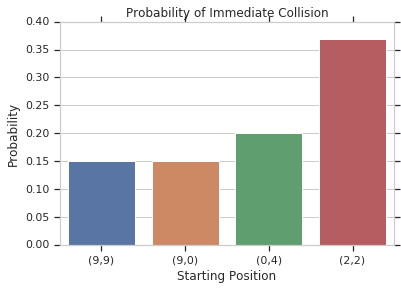

In [395]:
ax = sns.barplot(x="start", y="probability", data=prob_df).set_title('Probability of Immediate Collision')
plot = ax.get_figure()
plt.xlabel("Starting Position")
plt.ylabel("Probability")
plot.savefig(fig_prefix + "immediate_collision_probability.png")
plot.savefig(fig_prefix + 'immediate_collision_probability.eps', format='eps', dpi=1000)

# Simulator Data Equivalent

In [348]:
#Get simulator hitting time data for 
#Start = (0,0)
#cross = (9,9) 99
#Near = (2,2) 22
#Full adj = (9,0) 9
#Half adj = (0,4) 40

In [349]:
cross_hitting_time = M[0,99]
cross_hitting_time

217.04292864890783

In [350]:
near_hitting_time = M[0,22]
near_hitting_time

123.16541562616223

In [351]:
full_adj_hitting_time = M[0,9]
full_adj_hitting_time

196.82253371829569

In [352]:
half_adj_hitting_time = M[0,40]
half_adj_hitting_time

155.46354571952668

# Comparing Simulator to Real Life Data

In [368]:
sim_data = {'start' : ['(9,9)','(9,0)','(0,4)','(2,2)'], 'hittingTime' : [cross_hitting_time, full_adj_hitting_time, half_adj_hitting_time,near_hitting_time]}
sim_mean_df = pd.DataFrame.from_dict(sim_data)
sim_mean_df['origin'] = 'Simulator'
sim_mean_df.head()

,hittingTime,start,origin
0,217.042929,"(9,9)",Simulator
1,196.822534,"(9,0)",Simulator
2,155.463546,"(0,4)",Simulator
3,123.165416,"(2,2)",Simulator


In [396]:
real_mean_data = {'start' : ['(9,9)','(9,0)','(0,4)','(2,2)'], 'hittingTime' : [cross_mean, adj_mean, half_adj_mean,near_mean]}
real_mean_df = pd.DataFrame.from_dict(real_mean_data)
real_mean_df['origin'] = 'Real Life'
real_mean_df.head()

,hittingTime,start,origin
0,11.445500,"(9,9)",Real Life
1,8.443500,"(9,0)",Real Life
2,13.382500,"(0,4)",Real Life
3,10.069474,"(2,2)",Real Life


In [397]:
mean_df = pd.concat([real_mean_df, sim_mean_df], ignore_index=True)
mean_df

,hittingTime,start,origin
0,11.445500,"(9,9)",Real Life
1,8.443500,"(9,0)",Real Life
2,13.382500,"(0,4)",Real Life
3,10.069474,"(2,2)",Real Life
4,217.042929,"(9,9)",Simulator
5,196.822534,"(9,0)",Simulator
6,155.463546,"(0,4)",Simulator
7,123.165416,"(2,2)",Simulator


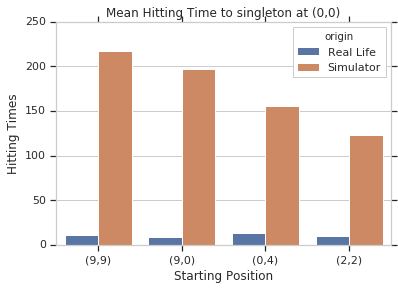

In [398]:
ax = sns.barplot(x="start", y="hittingTime", hue = 'origin', data=mean_df).set_title('Mean Hitting Time to singleton at (0,0)')
plot = ax.get_figure()
plt.xlabel("Starting Position")
plt.ylabel("Hitting Times")
plot.savefig(fig_prefix + "mean_hitting_times.png")
plot.savefig(fig_prefix + 'immediate_collision_probability.eps', format='eps', dpi=1000)
#This doesnt produce a great graphic....

In [399]:
sim_norm_mean_df = sim_mean_df.copy() 
sim_norm_mean_df['hittingTime'] = (sim_mean_df['hittingTime']) / (sim_mean_df['hittingTime'].max())
sim_norm_mean_df

,hittingTime,start,origin
0,1.000000,"(9,9)",Simulator
1,0.906837,"(9,0)",Simulator
2,0.716280,"(0,4)",Simulator
3,0.567470,"(2,2)",Simulator


In [400]:
real_norm_mean_df = real_mean_df.copy() 
real_norm_mean_df['hittingTime'] = (real_norm_mean_df['hittingTime']) / (real_norm_mean_df['hittingTime'].max())
real_norm_mean_df

,hittingTime,start,origin
0,0.855259,"(9,9)",Real Life
1,0.630936,"(9,0)",Real Life
2,1.000000,"(0,4)",Real Life
3,0.752436,"(2,2)",Real Life


In [401]:
norm_mean_df = pd.concat([real_norm_mean_df, sim_norm_mean_df], ignore_index=True)
norm_mean_df

,hittingTime,start,origin
0,0.855259,"(9,9)",Real Life
1,0.630936,"(9,0)",Real Life
2,1.000000,"(0,4)",Real Life
3,0.752436,"(2,2)",Real Life
4,1.000000,"(9,9)",Simulator
5,0.906837,"(9,0)",Simulator
6,0.716280,"(0,4)",Simulator
7,0.567470,"(2,2)",Simulator


<class 'matplotlib.text.Text'>


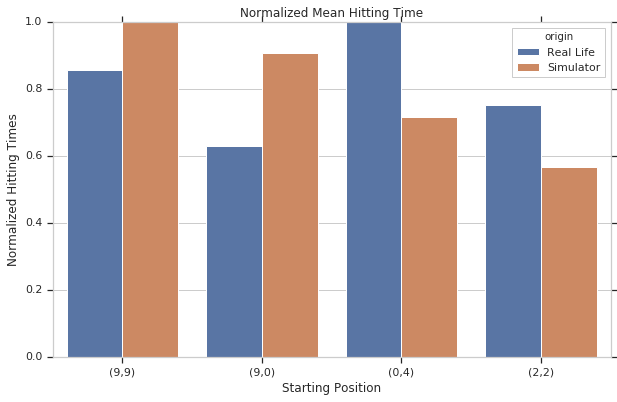

In [402]:
ax = sns.barplot(x="start", y="hittingTime", hue = 'origin', data=norm_mean_df).set_title('Normalized Mean Hitting Time')
print(type(ax))
plt.xlabel("Starting Position")
plt.ylabel("Normalized Hitting Times")
plot = ax.get_figure()
plot.set_size_inches(10, 6)
plot.savefig(fig_prefix + "Normalized_mean_hitting_times.png")
plot.savefig(fig_prefix + 'Normalized_mean_hitting_times.eps', format='eps', dpi=1000)

# Calculate normalized 